In [1]:
# necessary imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import zero_one_loss
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

In [2]:
header = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']
df = pd.read_csv('/content/chronic_kidney_disease.arff', names = header)


In [3]:
df.shape

(427, 25)

In [4]:
df = df.dropna(axis=0, how='any') # if any of the row is na, remove



In [5]:
df.shape

(399, 25)

In [6]:
def remove_tab(element):
    if '\t' in element:
        return element.replace('\t','')
    else:
        return element
        

In [7]:
df = df.applymap(remove_tab)

In [8]:
def remove_space(element):
    if ' ' in element:
        return element.replace(' ', '')
    else:
        return element

In [9]:
df = df.applymap(remove_space)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 27 to 426
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      399 non-null    object
 1   blood_pressure           399 non-null    object
 2   specific_gravity         399 non-null    object
 3   albumin                  399 non-null    object
 4   sugar                    399 non-null    object
 5   red_blood_cells          399 non-null    object
 6   pus_cell                 399 non-null    object
 7   pus_cell_clumps          399 non-null    object
 8   bacteria                 399 non-null    object
 9   blood_glucose_random     399 non-null    object
 10  blood_urea               399 non-null    object
 11  serum_creatinine         399 non-null    object
 12  sodium                   399 non-null    object
 13  potassium                399 non-null    object
 14  haemoglobin              399 non-null    

In [11]:
for col in header:
    print(df[col].unique())

['48' '7' '62' '51' '60' '68' '24' '52' '53' '50' '63' '40' '47' '61' '21'
 '42' '75' '69' '?' '73' '70' '65' '76' '72' '82' '46' '45' '35' '54' '11'
 '59' '67' '15' '55' '44' '26' '64' '56' '5' '74' '38' '58' '71' '34' '17'
 '12' '43' '41' '57' '8' '39' '66' '81' '14' '27' '83' '30' '4' '3' '6'
 '32' '80' '49' '90' '78' '19' '2' '33' '36' '37' '23' '25' '20' '29' '28'
 '22' '79']
['80' '50' '70' '90' '?' '100' '60' '110' '140' '180' '120']
['1.020' '1.010' '1.005' '1.015' '?' '1.025']
['1' '4' '2' '3' '0' '?' '5']
['0' '3' '4' '1' '?' '2' '5']
['?' 'normal' 'abnormal']
['normal' 'abnormal' '?']
['notpresent' 'present' '?']
['notpresent' 'present' '?']
['121' '?' '423' '117' '106' '74' '100' '410' '138' '70' '490' '380' '208'
 '98' '157' '76' '99' '114' '263' '173' '95' '108' '156' '264' '123' '93'
 '107' '159' '140' '171' '270' '92' '137' '204' '79' '207' '124' '144'
 '91' '162' '246' '253' '141' '182' '86' '150' '146' '425' '112' '250'
 '360' '163' '129' '133' '102' '158' '165' '132'

In [12]:
df.shape

(399, 25)

In [13]:
df = df.replace('?', np.nan)
df.shape

(399, 25)

In [14]:
numerical_cols = ['age', 'blood_pressure','specific_gravity','albumin','sugar','blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']
df[numerical_cols] = df[numerical_cols].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 27 to 426
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      390 non-null    float64
 1   blood_pressure           387 non-null    float64
 2   specific_gravity         352 non-null    float64
 3   albumin                  353 non-null    float64
 4   sugar                    350 non-null    float64
 5   red_blood_cells          247 non-null    object 
 6   pus_cell                 334 non-null    object 
 7   pus_cell_clumps          395 non-null    object 
 8   bacteria                 395 non-null    object 
 9   blood_glucose_random     355 non-null    float64
 10  blood_urea               380 non-null    float64
 11  serum_creatinine         382 non-null    float64
 12  sodium                   312 non-null    float64
 13  potassium                311 non-null    float64
 14  haemoglobin              

In [15]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has ['ckd' 'notckd'] values



In [16]:
df['class'] = df['class'].map({'ckd': 0, 'notckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [17]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



In [18]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [19]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values



In [20]:
df.shape

(399, 25)

In [21]:
df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [22]:
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [23]:


for col in num_cols:
    random_value_imputation(col)
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
class                     0
dtype: int64

In [24]:


random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
dtype: int64

In [25]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories



In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [27]:
# data splitting in X,y
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [28]:
x

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
27,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,131.0,5.0,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
28,7.0,50.0,1.020,4.0,0.0,1,1,0,0,144.0,18.0,0.8,137.0,3.3,11.3,38.0,6000.0,6.0,0,0,0,0,0,0
29,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,137.0,3.5,9.6,31.0,7500.0,3.2,0,1,0,1,0,1
30,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
31,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,136.0,5.7,11.6,35.0,7300.0,4.6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,0,0,0,0,0
423,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,0,0,0,0,0
424,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,0,0,0,0,0
425,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,0,0,0,0,0


In [29]:
y

27     0
28     0
29     0
30     0
31     0
      ..
422    1
423    1
424    1
425    1
426    1
Name: class, Length: 399, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=12)

Using Naive bayes

In [31]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("Naive Bayes score: ",nb.score(X_test, y_test))

GaussianNB()

In [32]:
y_pred = nb.predict(X_test)

In [33]:
print("Naive Bayes score: ",nb.score(X_test, y_test))

Naive Bayes score:  0.975


In [34]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        48
           1       0.97      0.97      0.97        32

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



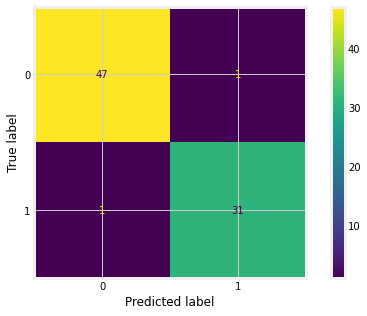

In [35]:
import matplotlib
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
matplotlib.rcParams['figure.figsize'] = (8,5)
plot_confusion_matrix(nb,X_test,y_test);

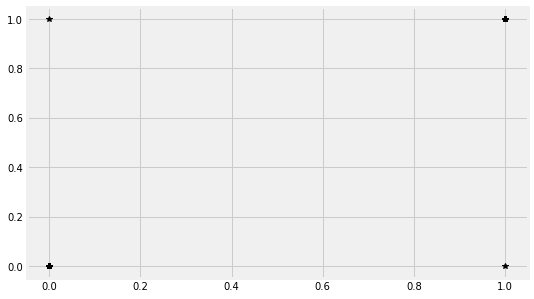

In [36]:
plt.plot(y_pred,y_test,'*', color ="black")
plt.show()

In [88]:
df_norm=df.copy()
for column in df_norm.columns:
    df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
    


In [89]:
x_knn = df_norm.iloc[:, :-1]
y_knn = df_norm.iloc[:, -1]

In [78]:
X_traink, X_testk, y_traink, y_testk = train_test_split(x_knn, y_knn, test_size=0.20, random_state=12)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
#dist = DistanceMetric.get_metric('euclidean')

Text(0, 0.5, 'Erreur')

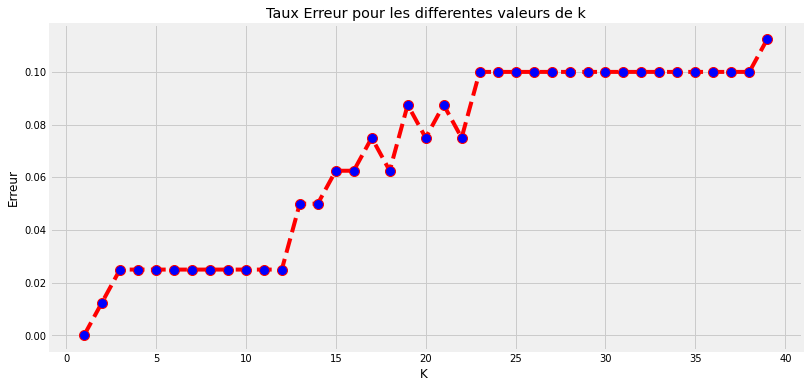

In [79]:
error = []
#Tester k de 1 à 40 et la distance Manhattan
for i in range(1, 40):
    knn = KNeighborsClassifier(i,metric='euclidean')
    knn_model = knn.fit(X_traink, y_traink)
    pred_i = knn_model.predict(X_testk)
    error.append(np.mean(pred_i != y_testk))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [85]:
knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
knn_model = knn.fit(X_traink, y_traink)

In [86]:
y_pred = knn.predict(X_testk)
print("knn score: ",knn.score(X_testk, y_testk))

knn score:  0.975


In [87]:
print(classification_report(y_testk, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        48
         1.0       0.97      0.97      0.97        32

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



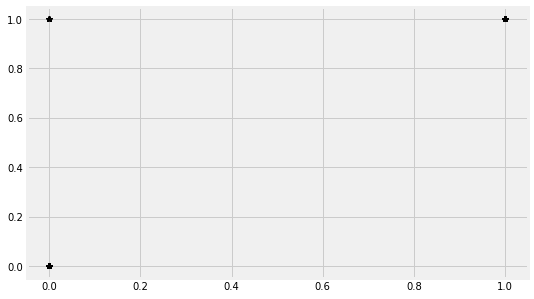

In [84]:
plt.plot(y_test,y_pred,'*', color ="black")
plt.show()

In [43]:
from sklearn import svm
clf = svm.SVC(kernel ='linear',random_state = 42)
clf.fit(X_train, y_train)
print("SVM score: ",clf.score(X_test, y_test))
y_pred_clf = clf.predict(X_test)

SVM score:  0.9875


In [44]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.97      1.00      0.98        32

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



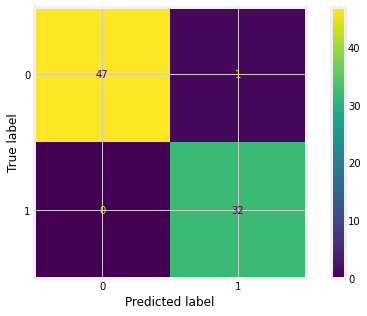

In [45]:
import matplotlib
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
matplotlib.rcParams['figure.figsize'] = (8,5)
plot_confusion_matrix(clf,X_test,y_test);

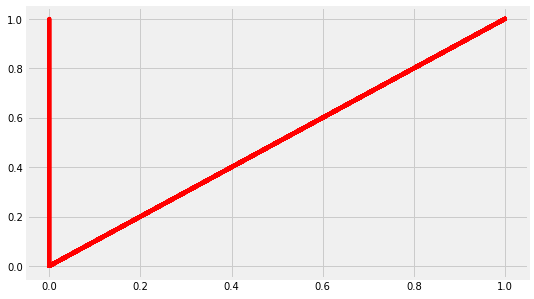

In [46]:
plt.plot(y_test, y_pred_clf, color ="red")
plt.show()

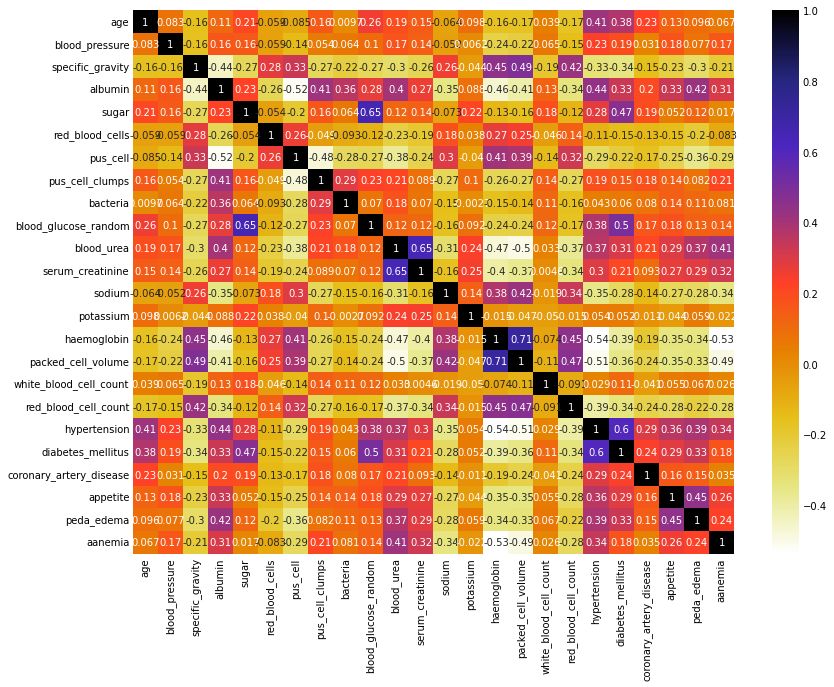

In [47]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor,annot = True ,cmap=plt.cm.CMRmap_r)
plt.show()

In [48]:
def correlation(dataset,threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [49]:


corr_features = correlation(X_train,0.5)
len(set(corr_features))
corr_features

{'aanemia',
 'blood_glucose_random',
 'diabetes_mellitus',
 'hypertension',
 'packed_cell_volume',
 'pus_cell',
 'serum_creatinine'}

 # naive_bayes with features selection 

In [65]:
newx_train = X_train.drop(df[corr_features],axis = 1)
newx_test = X_test.drop(df[corr_features],axis = 1)

In [67]:
newx_train.shape

(319, 17)

In [68]:
nb = GaussianNB()
nb.fit(newx_train, y_train)

GaussianNB()

In [69]:
y_pred = nb.predict(newx_test)
print("Naive Bayes score: ",nb.score(newx_test, y_test))

Naive Bayes score:  0.9125


In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.92        48
           1       0.84      0.97      0.90        32

    accuracy                           0.91        80
   macro avg       0.91      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



# svm with features selection 

In [71]:
clf = svm.SVC(kernel ='linear',random_state = 42)
clf.fit(newx_train, y_train)
print("SVM score: ",clf.score(newx_test, y_test))
y_pred_clf = clf.predict(newx_test)

SVM score:  0.9375


In [72]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        48
           1       0.91      0.94      0.92        32

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80



# knn with features selection

In [90]:
df_norm=df.copy()
for column in df_norm.columns:
    df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())

In [91]:
x_knn = df_norm.iloc[:, :-1]
y_knn = df_norm.iloc[:, -1]

In [92]:
X_traink, X_testk, y_traink, y_testk = train_test_split(x_knn, y_knn, test_size=0.20, random_state=12)

In [93]:
newx_train = X_traink.drop(df[corr_features],axis = 1)
newx_test = X_testk.drop(df[corr_features],axis = 1)

In [94]:
knn = KNeighborsClassifier(n_neighbors=27,metric='euclidean')
knn_model = knn.fit(newx_train, y_train)
y_pred = knn.predict(newx_test)
print("knn score: ",knn.score(newx_test, y_test))
print(classification_report(y_test, y_pred))

knn score:  0.9375
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        48
           1       0.89      0.97      0.93        32

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80



In [95]:
from sklearn.ensemble import AdaBoostClassifier

In [96]:
AdaModelnb = AdaBoostClassifier(n_estimators = 100 ,base_estimator =nb ,learning_rate=1)

In [97]:
model = AdaModelnb.fit(X_train,y_train)

In [98]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [99]:
import sklearn.metrics as metrics

In [100]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.95


In [101]:
AdaModelsvm = AdaBoostClassifier(clf,n_estimators = 100 ,learning_rate=1,algorithm='SAMME')
model = AdaModelsvm.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.975


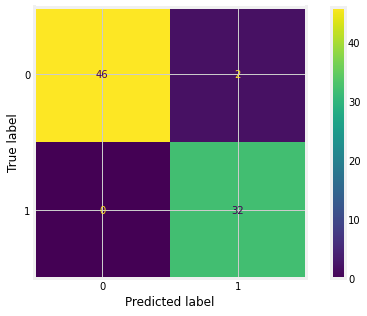

In [102]:
plot_confusion_matrix(AdaModelsvm,X_test,y_test);